In [50]:
import black
import jupyter_black

jupyter_black.load()

In [51]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler

import openTSNE as TSNE

In [8]:
print("hello world")

hello world


In [11]:
sr_points, sr_color = sklearn.datasets.make_swiss_roll(
    n_samples=1000, noise=0.0, random_state=None
)


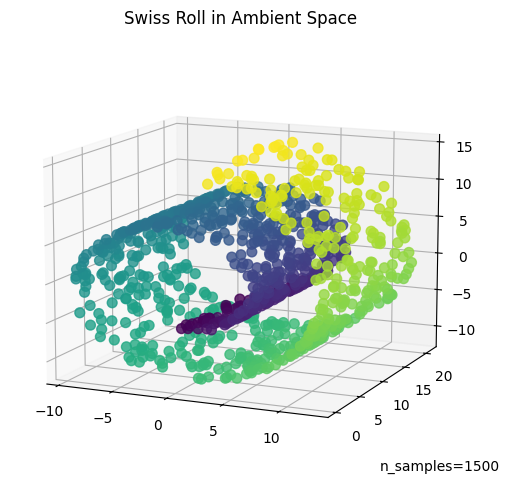

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [33]:
tsne_results = TSNE.TSNE(perplexity=30).fit(sr_points)

In [36]:
perplexities = [5, 30, 50, 100]
tsne_results = [TSNE.TSNE(perplexity=p).fit(sr_points) for p in perplexities]

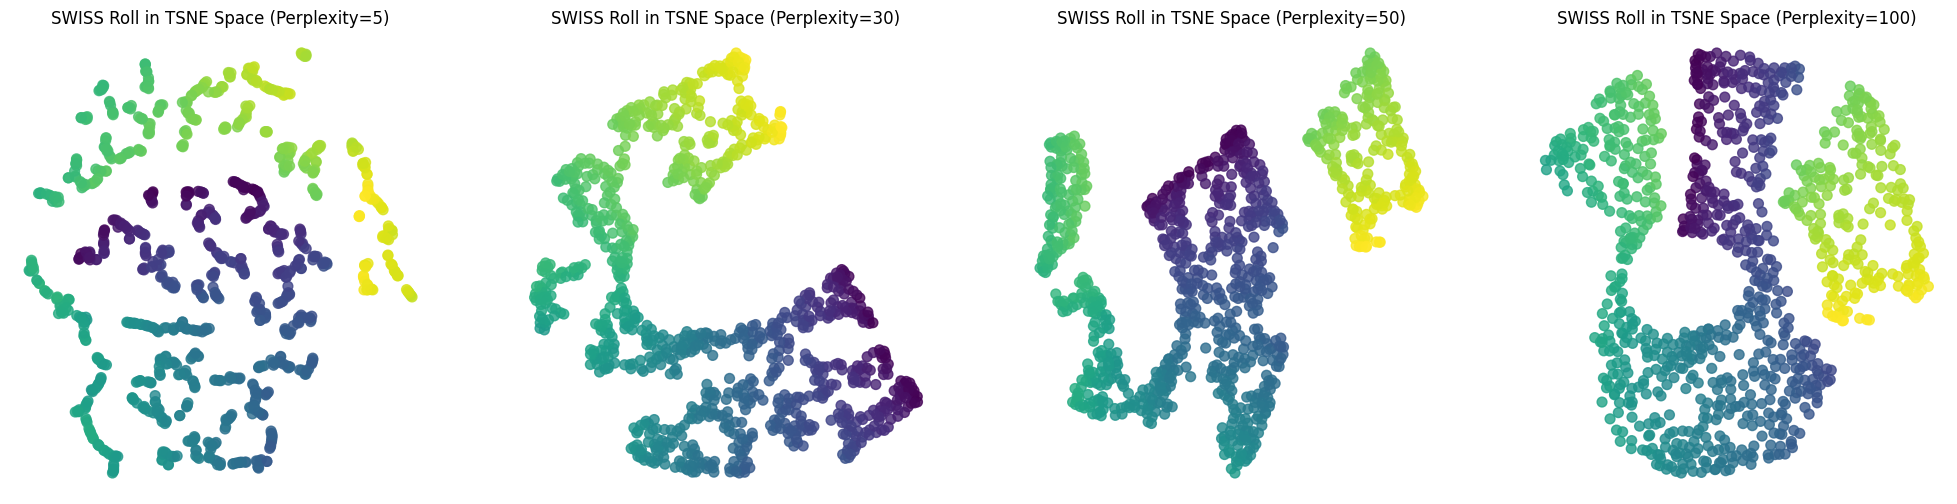

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
for i, p in enumerate(perplexities):

    ax[i].scatter(
        tsne_results[i][:, 0], tsne_results[i][:, 1], c=sr_color, s=50, alpha=0.8
    )
    ax[i].set_title(f"SWISS Roll in TSNE Space (Perplexity={p})")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    sns.despine(left=True, bottom=True)

In [40]:
digits = sklearn.datasets.load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

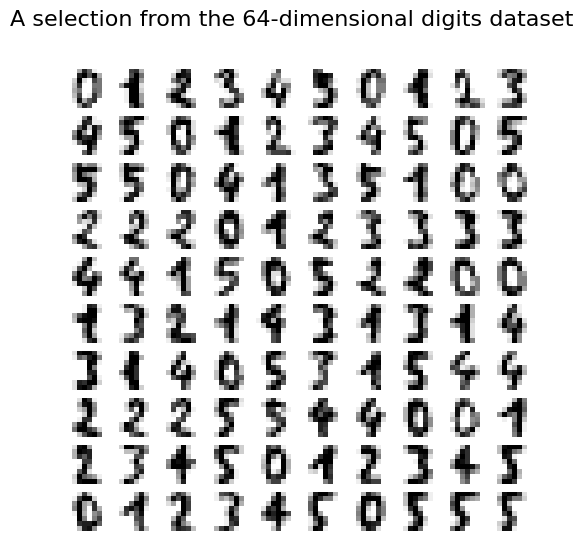

In [41]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [45]:
X = MinMaxScaler().fit_transform(X)
digits_tsne = TSNE.TSNE(perplexity=30).fit(X)



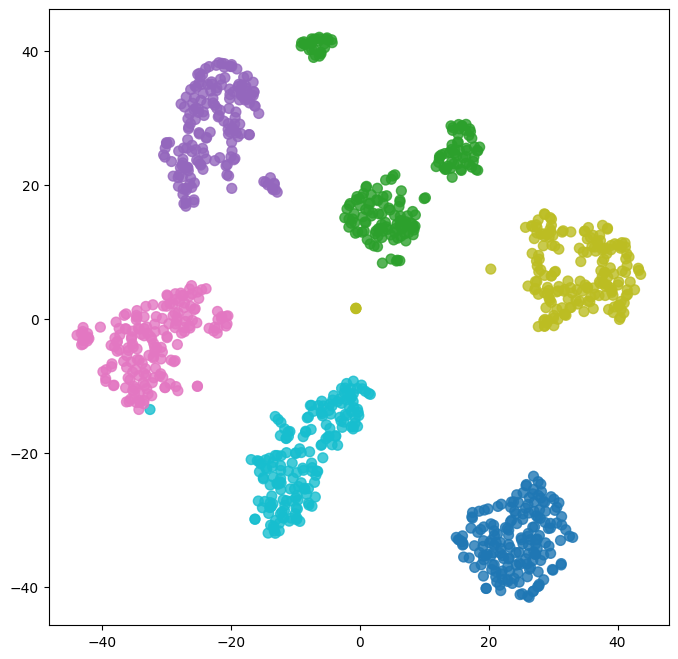

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(
    digits_tsne[:, 0], digits_tsne[:, 1], c=y, s=50, alpha=0.8, cmap=plt.cm.tab10
)

In [52]:
# print kl_divergence
print(digits_tsne.kl_divergence)

0.6018592516616277


In [63]:
dofs = np.linspace(0, 2, 10)

KL = []
for dof in dofs:
    digits_tsne = TSNE.TSNE(perplexity=30, dof=dof).fit(X)
    KL.append(digits_tsne.kl_divergence)

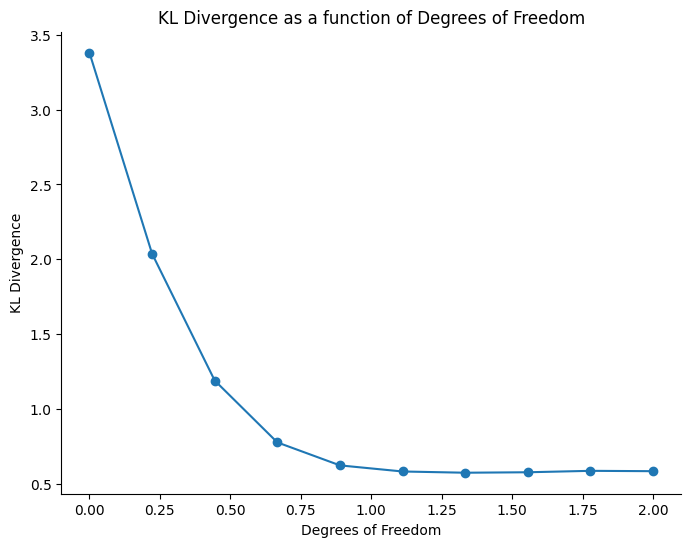

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(dofs, KL, marker="o")
ax.set_xlabel("Degrees of Freedom")
ax.set_ylabel("KL Divergence")
ax.set_title("KL Divergence as a function of Degrees of Freedom")
sns.despine()